In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from scipy.spatial import distance
from scipy.special import erfc

In [2]:
#Geração de símbolos qpsk
def mod(V):
    ip = np.zeros((len(V),1),dtype=complex)
    inc = 0
    for v in V:
        if(v==0):
            ip[inc] = -1.0 - 1j*1.0
        elif(v==1):
            ip[inc] = -1.0 + 1j*1.0
        elif(v==2):
            ip[inc] = 1.0 - 1j*1.0
        else:
            ip[inc] = 1.0 + 1j*1.0
        inc += 1
        
    # Normalization of energy to 1.
    s = (1/np.sqrt(2))*ip;
    return s

In [6]:
# Number of QPSK symbols to be transmitted.
N = 400000
S = np.random.randint(0, 4, size=(N, 1))

# Create Es/N0 vector.
EsN0dB = np.arange(-2,22,2)

ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))

for idx in range(0,len(EsN0dB)):
    
    print('Es/N0 dB:', EsN0dB[idx])
    
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
    
    sb = mod(S) + (np.sqrt(EsN0Lin) * noise)
        
    sbr = sb.real
    sbi = sb.imag
    
    stx = np.array(S)
         
    symb = np.c_[sbr, sbi]
        
    km = KMeans(n_clusters=4)
    y_km = km.fit_predict(symb) 
    
    centroids = km.cluster_centers_
    
    
    
    yp = mod(y_km)
        
    ypr = yp.real
    ypi = yp.imag
    
    Yp = np.c_[ypr, ypi]
    
    ds = []
    
    for i in range(0, N):        
        for j in range(0, len(centroids)):            
            ds.append(distance.euclidean(Yp[i], centroids[j]))
    
    correct = 0
    
    for i in range(0, len(ds)):
        if(ds[i] <= 0.01):
            correct = correct + 1
    
    print('# of correct symbols: ', correct)
    
    ser_simu[idx] = (N - correct)/N
    print ('SER:',ser_simu[idx])
    
    # Theoretical BPSK BER.    
    ser_theo[idx] = erfc( np.sqrt(  0.5*(10.0**(EsN0dB[idx]/10.0))   ) ) - (1/4)*(erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))))**2.0;

Es/N0 dB: -2
# of correct symbols:  0
SER: 1.0
Es/N0 dB: 0
# of correct symbols:  0
SER: 1.0
Es/N0 dB: 2
# of correct symbols:  0
SER: 1.0
Es/N0 dB: 4
# of correct symbols:  0
SER: 1.0
Es/N0 dB: 6
# of correct symbols:  400000
SER: 0.0
Es/N0 dB: 8
# of correct symbols:  400000
SER: 0.0
Es/N0 dB: 10
# of correct symbols:  400000
SER: 0.0
Es/N0 dB: 12
# of correct symbols:  400000
SER: 0.0
Es/N0 dB: 14
# of correct symbols:  400000
SER: 0.0
Es/N0 dB: 16
# of correct symbols:  400000
SER: 0.0
Es/N0 dB: 18
# of correct symbols:  400000
SER: 0.0
Es/N0 dB: 20
# of correct symbols:  400000
SER: 0.0


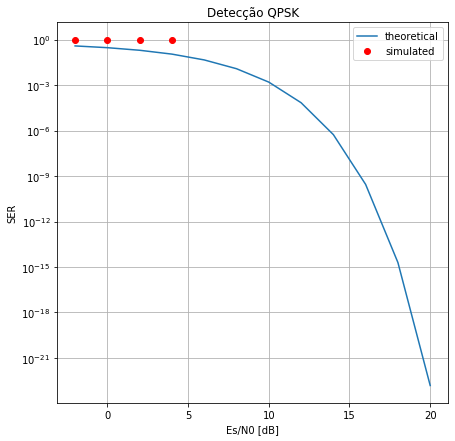

In [7]:
fig = plt.figure(figsize=(7,7))

plt.plot(EsN0dB, ser_theo, label='theoretical')
plt.plot(EsN0dB, ser_simu, 'ro', label='simulated')

plt.xscale('linear')
plt.yscale('log')

plt.xlabel('Es/N0 [dB]')
plt.ylabel('SER')

plt.grid(True)

plt.title('Detecção QPSK')

plt.legend()


plt.show()

In [8]:
# Print Es/N0 versus BER values.
for i in range(0,len(ser_simu)): print('Es/N0:%d \t- SER: %e' % (EsN0dB[i], ser_simu[i]))

Es/N0:-2 	- SER: 1.000000e+00
Es/N0:0 	- SER: 1.000000e+00
Es/N0:2 	- SER: 1.000000e+00
Es/N0:4 	- SER: 1.000000e+00
Es/N0:6 	- SER: 0.000000e+00
Es/N0:8 	- SER: 0.000000e+00
Es/N0:10 	- SER: 0.000000e+00
Es/N0:12 	- SER: 0.000000e+00
Es/N0:14 	- SER: 0.000000e+00
Es/N0:16 	- SER: 0.000000e+00
Es/N0:18 	- SER: 0.000000e+00
Es/N0:20 	- SER: 0.000000e+00
